<h1><center> Midterm Exam </center></h1>
    
<h6> Maurício Jesuíno Nogueira <br>
00263071</h6>

<h6> <center> 04 de março de 2022 </center></h6>


* 1. Na série de dados abaixo, a primeira coluna corresponde a um código digital enviado à um conversor DA, enquanto a segunda coluna corresponde ao valor de tensão produzido. Para este conversor, encontre a resolução, o LSB, a INL, a DNL e o Alcance Dinâmico.


In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# Import downloaded data to numpy array

data = np.loadtxt('dataset1.dat.txt', unpack=True)
data = data.transpose()

size = len(data[:,1])
voltage = data[:,1]

Text(0.5, 1.0, 'Conversor DA')

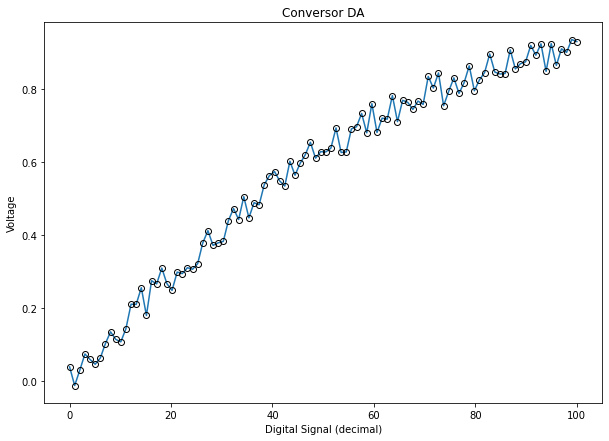

In [3]:
x = np.linspace(0, size, size)

fig, ax = plt.subplots(figsize=(10,7))

ax.plot(x, voltage, marker='o', mfc='none', mec='k')
ax.set_xlabel('Digital Signal (decimal)')
ax.set_ylabel('Voltage')
ax.set_title('Conversor DA')



<text> A resolução é dada por: $$R = 2^{n}$$ </text> <br>
<text> Na série de valores dada, o maior número, em binário, é 1100011. Este é um número de 7 bits, portanto:
$$ R = 2^{n} = 2^{7} = 128 $$ </text> <br>

<text> O LSB (Least Significant Bit) é igual a: $$LSB = \frac{V_{ref}}{2^{n}} = \frac{V_{full scale} - V_{zero scale}}{2^{n} - 1} $$</text>

In [4]:
n = 7
R = 2**n #100

Vfull = np.amax(voltage)
Vzero = np.amin(voltage)

LSB = (Vfull - Vzero) / (R - 1)

print(f'LSB = {LSB}')

LSB = 0.0074589338173398365


<text> Por sua vez, a INL (Integral Nonlinearity) é calculada de acordo com: 
$$ INL = \frac{V_{out} - V_{ideal}}{LSB}  $$
</text> <br>
<text> Ou seja, a INL é a diferença entre o valor que o conversor DA emite e o valor ideal que seria obtido caso o conversor fosse perfeitamente linear (um múltiplo do LSB), dividida pelo LSB.</text>

Text(0.5, 1.0, 'Integral Nonlinearity')

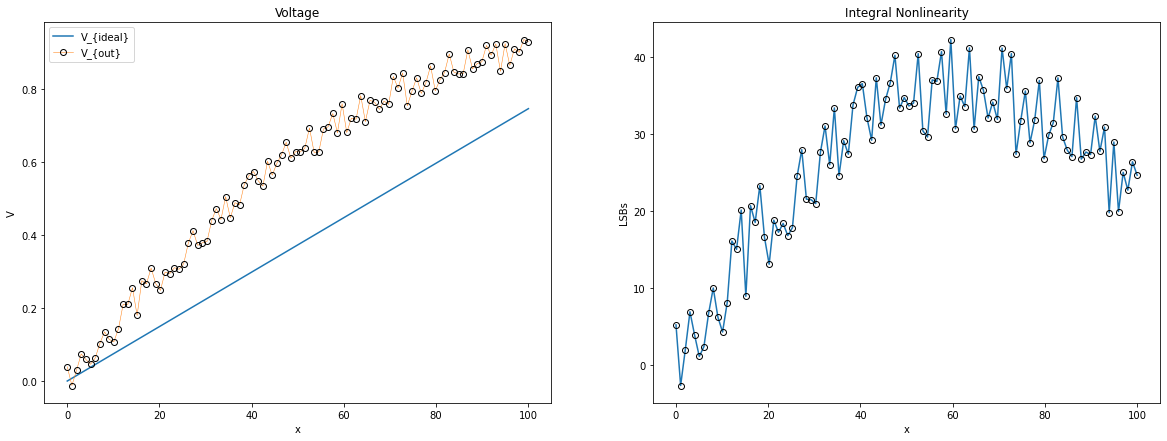

In [5]:
# Integral Non-Linearity
ideal  = LSB * x
INL = (voltage - ideal) / LSB

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

ax1.plot(x, ideal, label=r'V_{ideal}')
ax1.plot(x, voltage, marker='o', mfc='none', mec='k', linewidth='0.5', label=r'V_{out}')
ax1.set_title('Voltage')
ax1.set_xlabel('x')
ax1.set_ylabel('V')
ax1.legend()

ax2.plot(x, INL, marker='o', mfc='none', mec='k')
ax2.set_xlabel('x')
ax2.set_ylabel('LSBs')
ax2.set_title('Integral Nonlinearity')

<text>A DNL (Differential Nonlinearity) é dada por: 
$$ DNL = \frac{\Delta V_{out} - LSB}{LSB} $$</text> <br>

<text>Onde Vout é a diferença entre dois pontos consecutivos. Assim, a DNL compara a distância esperada entre dois pontos adjacentes (no caso do DAC ideal) com a distância real.</text>

Text(0.5, 1.0, 'Differential Nonlinearity')

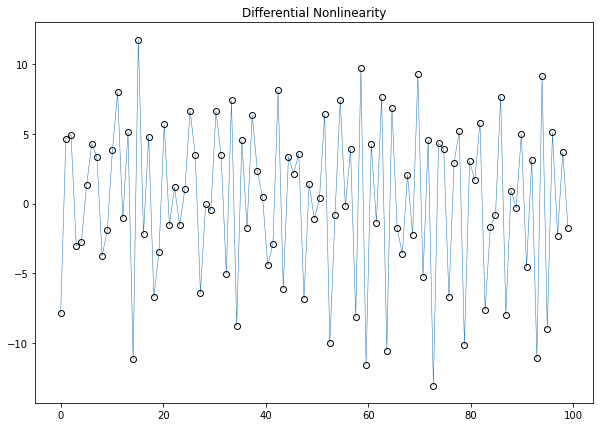

In [6]:
# Differential Nonlinearity

DeltaV = [(voltage[i] - voltage[i-1]) for i in range(1, size)]

DNL = (DeltaV - LSB) / LSB

fig, ax = plt.subplots(figsize=(10, 7))

#ax.plot(x, ideal, label=r'V_{ideal}')
ax.plot(np.linspace(0, 99, num=99), DNL, marker='o', mfc='none', mec='k', linewidth=0.5, label='DNL')
ax.set_title('Differential Nonlinearity')

<text> Por fim, o Alcance Dinâmico (Dynamic Range - D) é igual a:
$$ D = 20\log_{10}{\left(\frac{V_{max}}{V_{min}}\right)} $$</text>

In [7]:
D = 20 * np.log10(abs(Vfull/Vzero))

print(f'Dynamic Range: D = {D} dB')

Dynamic Range: D = 37.66195726295348 dB


* 2. O circuito abaixo se comporta como um amplificador de corrente para a carga $R_L$:

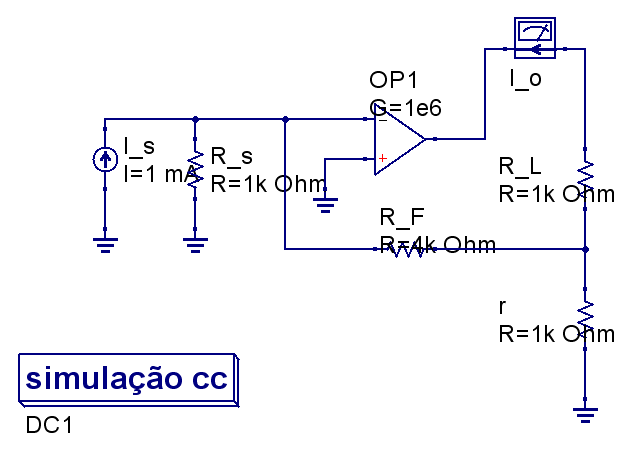

i) Encontre a corrente na carga $I_o$ em função da corrente de entrada $I_S$:

Para encontrar a corrente na carga $I_o$ começamos analisando algumas características do circuito:
* O circuito possui realimentação negativa
* As correntes na entrada do amplificador são iguais a zero
* $V_- \approx V_+ = 0$

Aplicando as leis de Kirchhoff, temos:


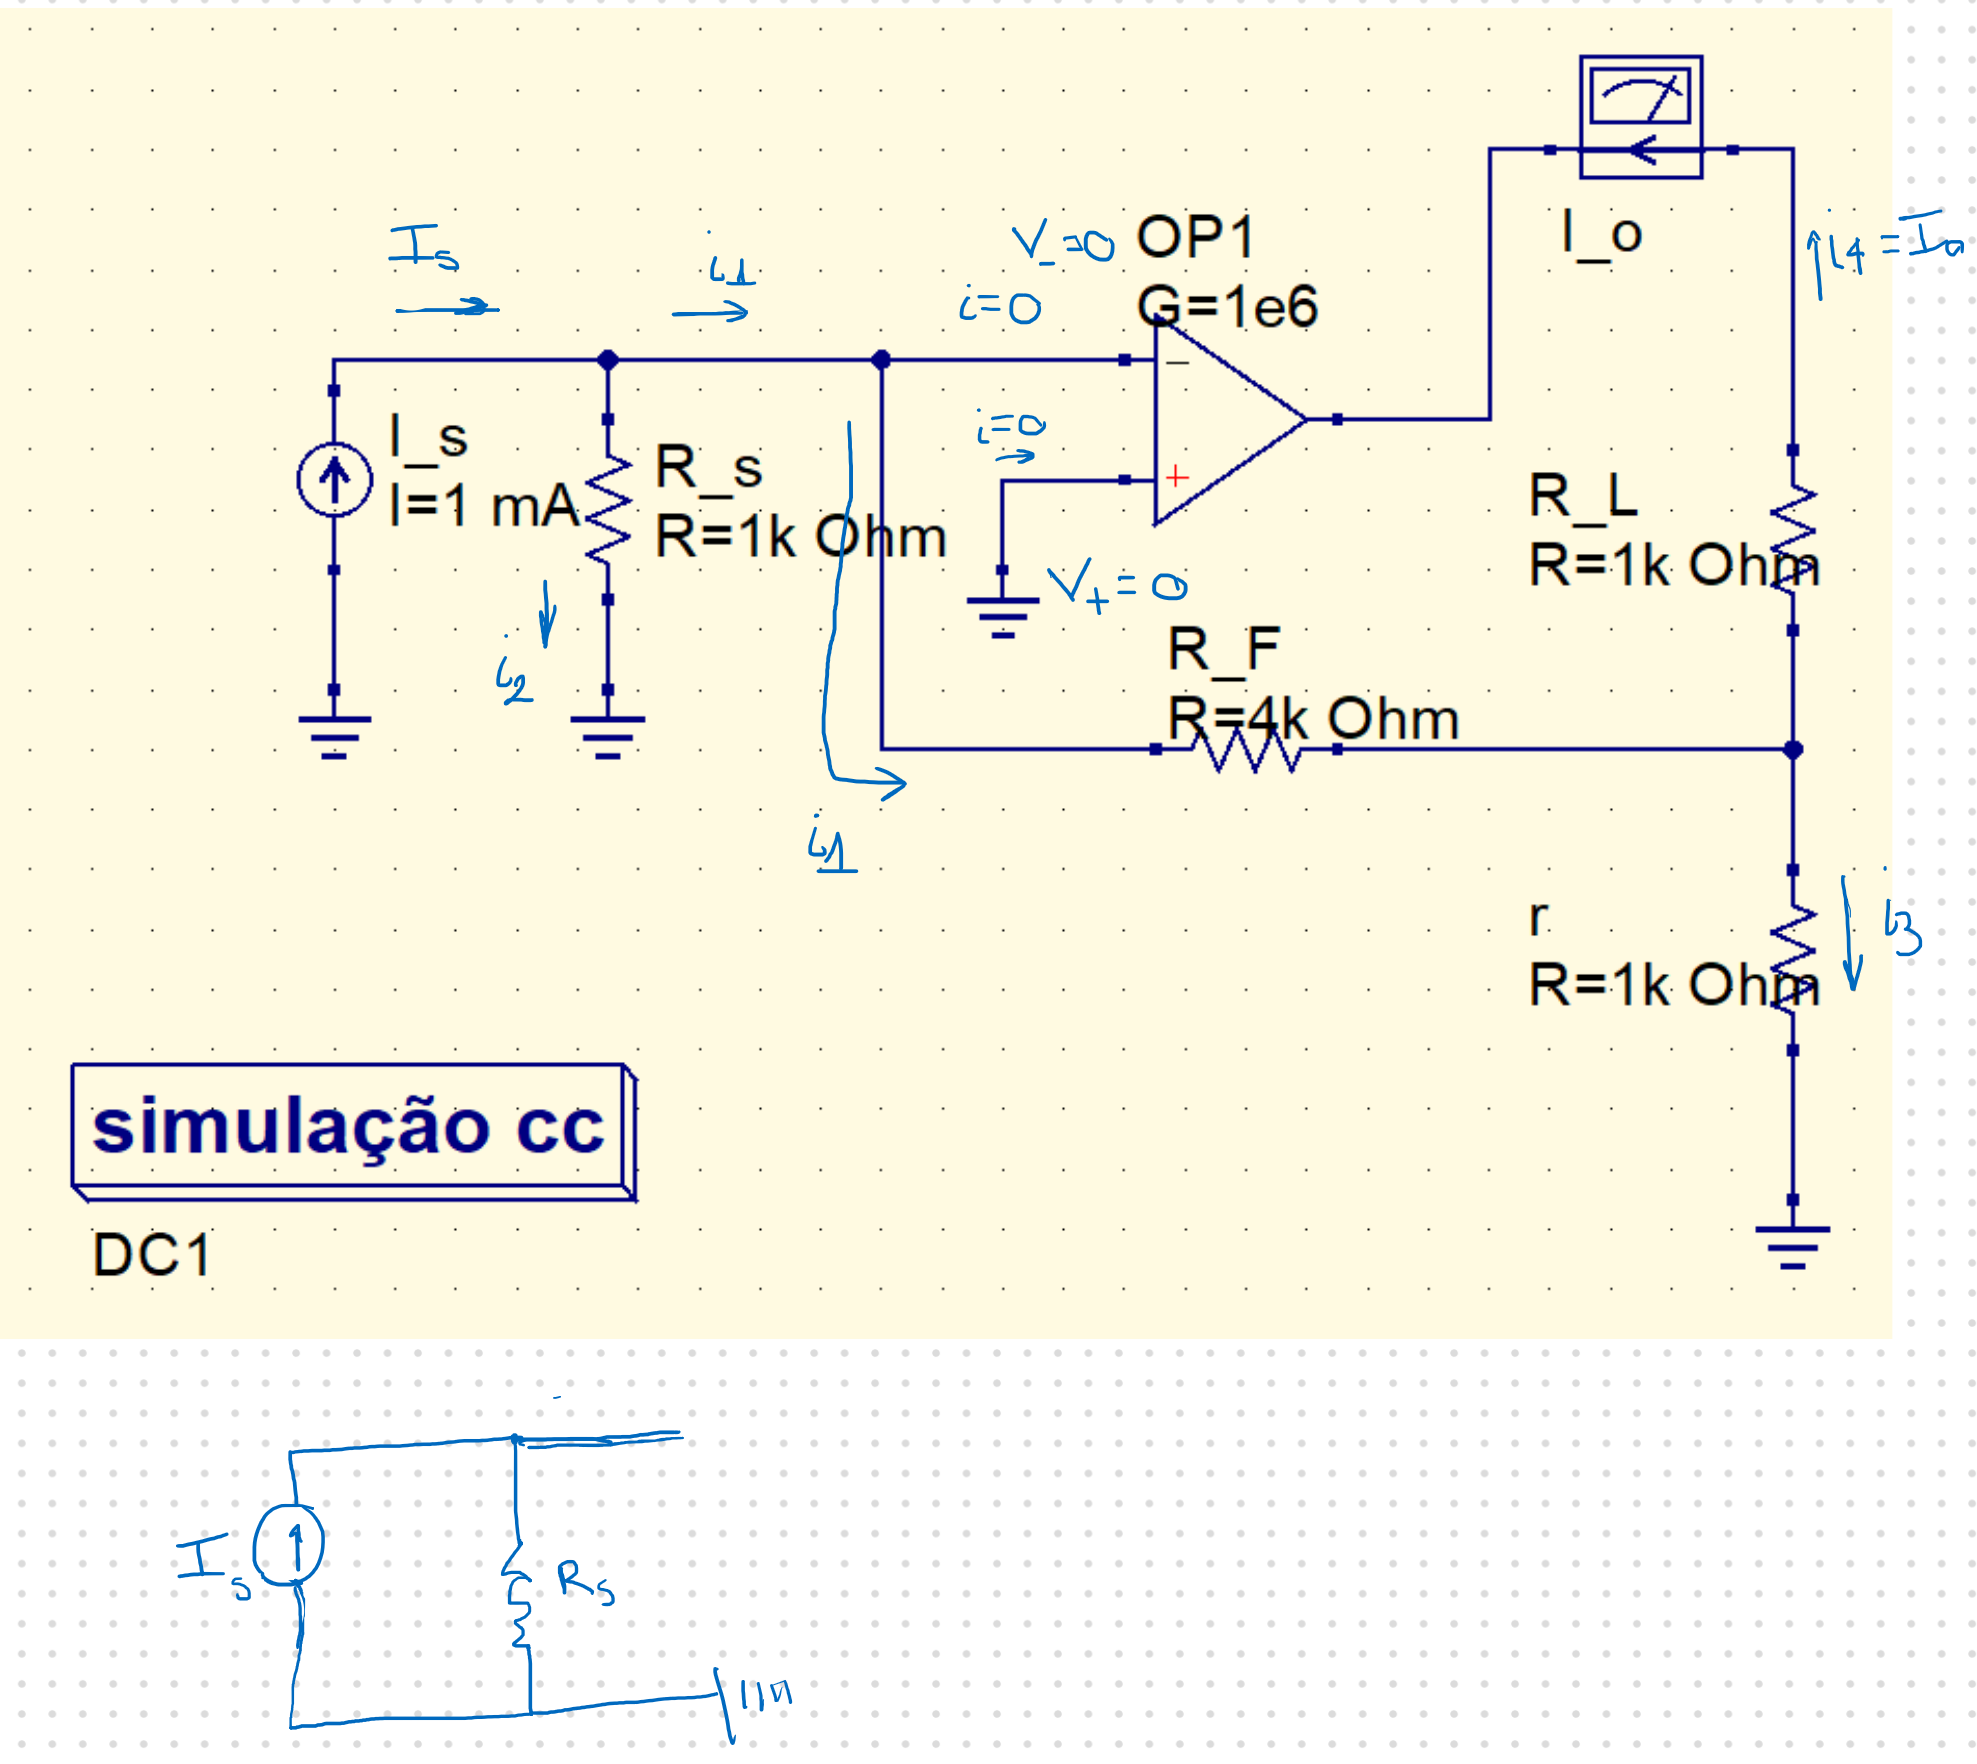

De onde tiramos as equações:

\begin{eqnarray}
I_o = i_1 - i_3 \\
i_1 = I_S - i_2 \\
I_o = I_S - (i_2 + i_3)
\end{eqnarray}

Onde a terceira equação é obtida a partir das outras duas. Temos também que:

\begin{eqnarray}
i_2 = V_S / R_S \\
i_3 = V_3 / r \\
V_3 = I_S - i_1 R_F
\end{eqnarray}

Fazendo as substituições e manipulações necessárias, e considerando $R_S = r$ e $R_F = 4r$, obtemos: 
$$I_o = 5I_S - 6i_2$$

Observando que podemos desenhar a fonte de corrente e o resistor $R_S$ como o equivalente de Norton, vemos que a corrente em $i_2$ é igual a zero. Assim:

$$I_o = 5I_S$$

Ou seja $I_o = 5mA$.
 
ii) Em 25ºC a razão entre a corrente de saída e a de entrada $I_o / I_S$ possui qual nível de ruído considerando apenas o ruído térmico dos resistores?

Considerando somente o ruído térmico em resistores, o ruído de Johnson-Nyquist, em forma de corrente ele é dado por:

$$ \frac{i_N}{\sqrt{\Delta f}} = \sqrt{\frac{4k_BT}{R}}$$

Na malha associada com $I_o$, temos os resistores $R_F (4k\Omega)$, $R_L(1k\Omega)$ e $r(1k\Omega)$. Na corrente de entrada temos somente $R_S(1k\Omega)$. Assim:

\begin{eqnarray}
\frac{i_F}{\sqrt{\Delta f}} = \sqrt{\frac{4k_BT}{(4k\Omega)}} \\ 
\frac{i_L}{\sqrt{\Delta f}} = \frac{i_r}{\sqrt{\Delta f}} = \frac{i_S}{\sqrt{\Delta f}} = \sqrt{\frac{4k_BT}{(1k\Omega)}} \\
\end{eqnarray}

In [8]:
# Noise calculations

k_b = 1.38e-23 # m^2.kg.s^-2.K^-1
T = 273 + 25 # K
R = 1e3 # Ohm (valid for r, R_L, R_S and r)
R_F = 4e3 # Ohm

i_F = np.sqrt(4 * k_b * T / R_F) # A/sqrt(Hz)
i = np.sqrt(4 * k_b * T / R) # A/sqrt(Hz)

print(f'i_F = {i_F * 1e12} pA/sqrt(Hz) and i = {i * 1e12} pA/sqrt(Hz)')

N_o = i_F + 2*i
N_S = i

answer = N_o / N_S

print(f'\n\n O nível de ruído é {answer}.')

i_F = 2.0279053232338042 pA/sqrt(Hz) and i = 4.0558106464676085 pA/sqrt(Hz)


 O nível de ruído é 2.5.


iii) Se a incerteza nos valores dos resistores é de ± 10%, qual é a incerteza na medida de $I_o/I_S$?

Quando associamos dois resistores quaisquer, $R_1$ e $R_2$, a incerteza resultante é a mesma tanto em paralelo quanto em série e calculada como:

$$ \left(\frac{\sigma_R}{R}\right)^2 = \left(\frac{\sigma_{R_1}}{R_1}\right)^2 + \left(\frac{\sigma_{R_2}}{R_2}\right)^2 $$

Com isso, nos valores de $I_o$:
\begin{eqnarray}
\left(\frac{\sigma_{R_o}}{R_o}\right)^2 = \left(\frac{\sigma_{R_F}}{R_F}\right)^2 + \left(\frac{\sigma_{R_L}}{R_L}\right)^2 + \left(\frac{\sigma_{r}}{r}\right)^2 \\[0.5cm]
\sigma_{R_o}^2 = 3(10\%)^2\\[0.5cm]
\sigma_{R_o} = 17.32\% 
\end{eqnarray}

No cálculo de $I_S$ temos somente o resistor $R_S$ resultando em $\sigma_{R_S} = 10\%$ .

Por na razão de $I_o / I_S$, a incerteza é:

\begin{eqnarray}
\left(\frac{\sigma_{raz}}{raz}\right)^2 = \left(\frac{\sigma_{I_o}}{I_o}\right)^2 + \left(\frac{\sigma_{I_S}}{I_S}\right)^2\\[0.5cm]
\left(\frac{\sigma_{raz}}{raz}\right)^2 = (17.32\%)^2 + (10\%)^2 \\[0.5cm]
\left(\sigma_{raz}\right) = 19.9\%
\end{eqnarray}